In [1350]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize

In [435]:
df = pd.read_csv('data/recyclestyle_outer_join.csv')
df.head()

text  price_x size  \
0                 @EMGIRL - Wool blend skirt! 16     40.0   16   
1        A WEAR - Emerald ribbed swing dress! 12     45.0   12   
2  ADIDAS - Swift run khaki metallic sneakers! 8     95.0    8   
3            AEROSOLES - Gold leather loafers! 8     49.0    8   
4   ALANNAH HILL - Wool blend pinafore dress! 10     25.0   10   

                 cleaned_text  category          brand  \
0                Wool blend       skirt       @EMGIRL    
1      Emerald ribbed swing       dress        A WEAR    
2  Swift run khaki metallic    sneakers        ADIDAS    
3              Gold leather     loafers     AEROSOLES    
4       Wool blend pinafore       dress  ALANNAH HILL    

                                     lower_title  \
0                 @emgirl - wool blend skirt! 16   
1        a wear - emerald ribbed swing dress! 12   
2  adidas - swift run khaki metallic sneakers! 8   
3            aerosoles - gold leather loafers! 8   
4   alannah hill - wool blend pinafore dress! 10   

                                           TITLE              BUST  \
0                 @EMGIRL - WOOL BLEND SKIRT! 16               NaN   
1        A WEAR - EMERALD RIBBED SWING DRESS! 12   46cms     WAIST   
2  ADIDAS - SWIFT RUN KHAKI METALLIC SNEAKERS! 8               NaN   
3            AEROSOLES - GOLD LEATHER LOAFERS! 8               NaN   
4   ALANNAH HILL - WOOL BLEND PINAFORE DRESS! 10   46cms     WAIST   

                   COLOUR                        ...                          \
0                   Black                        ...                           
1                   Black                        ...                           
2            Khaki, white                        ...                           
3            Bronze, gold                        ...                           
4   Charcoal black, brown                        ...                           

  HEIGHT           INNER SOLE  \
0    NaN                  NaN   
1    NaN                  NaN   
2    NaN   25.5cms      WIDTH   
3    NaN     25cms      WIDTH   
4    NaN                  NaN   

                                        MEASUREMENTS  \
0  WAIST: 46cms      HIPS: 63cms      LENGTH: 66cms    
1     BUST: 46cms     WAIST: 39cms     LENGTH: 90cms   
2  INNER SOLE: 25.5cms      WIDTH: 11cms      HEE...   
3  INNER SOLE: 25cms      WIDTH: 9cms      HEEL: ...   
4     BUST: 46cms     WAIST: 38cms     LENGTH: 99cms   

                                               NOTES SIZE ON BELT  \
0                                                NaN          NaN   
1    Thick ribbed fabric with a little stretch.  ...          NaN   
2                                                NaN          NaN   
3                                                NaN          NaN   
4   Made in Australia.  Back zip access.  Shoulde...          NaN   

   SIZE ON SHOE SIZE ON TAG             WAIST price_y  \
0           NaN          16   46cms      HIPS  $40.00   
1           NaN       10/38               NaN  $45.00   
2   US Mens 7.5         NaN               NaN  $95.00   
3             8         NaN               NaN  $49.00   
4           NaN          10               NaN  $25.00   

                                                 url  
0  https://recycle-style.myshopify.com/collection...  
1  https://recycle-style.myshopify.com/collection...  
2  https://recycle-style.myshopify.com/collection...  
3  https://recycle-style.myshopify.com/collection...  
4  https://recycle-style.myshopify.com/collection...  

[5 rows x 24 columns]

In [436]:
df.shape

(2108, 24)

In [437]:
df = df[df['price_x']!=0]

In [438]:
df.head(2)

text  price_x size  \
0           @EMGIRL - Wool blend skirt! 16     40.0   16   
1  A WEAR - Emerald ribbed swing dress! 12     45.0   12   

             cleaned_text category     brand  \
0            Wool blend      skirt  @EMGIRL    
1  Emerald ribbed swing      dress   A WEAR    

                               lower_title  \
0           @emgirl - wool blend skirt! 16   
1  a wear - emerald ribbed swing dress! 12   

                                     TITLE              BUST  COLOUR  \
0           @EMGIRL - WOOL BLEND SKIRT! 16               NaN   Black   
1  A WEAR - EMERALD RIBBED SWING DRESS! 12   46cms     WAIST   Black   

                         ...                         HEIGHT INNER SOLE  \
0                        ...                            NaN        NaN   
1                        ...                            NaN        NaN   

                                        MEASUREMENTS  \
0  WAIST: 46cms      HIPS: 63cms      LENGTH: 66cms    
1     BUST: 46cms     WAIST: 39cms     LENGTH: 90cms   

                                               NOTES SIZE ON BELT  \
0                                                NaN          NaN   
1    Thick ribbed fabric with a little stretch.  ...          NaN   

  SIZE ON SHOE SIZE ON TAG             WAIST price_y  \
0          NaN          16   46cms      HIPS  $40.00   
1          NaN       10/38               NaN  $45.00   

                                                 url  
0  https://recycle-style.myshopify.com/collection...  
1  https://recycle-style.myshopify.com/collection...  

[2 rows x 24 columns]

In [439]:
df.shape

(2068, 24)

In [440]:
df[df['price_x'].isnull()]

text  price_x size cleaned_text category brand  \
2103  NaN      NaN  NaN          NaN      NaN   NaN   
2104  NaN      NaN  NaN          NaN      NaN   NaN   
2105  NaN      NaN  NaN          NaN      NaN   NaN   
2106  NaN      NaN  NaN          NaN      NaN   NaN   
2107  NaN      NaN  NaN          NaN      NaN   NaN   

                                           lower_title  \
2103                  jeanswest - bn crop cardi! 10-12   
2104  jeanswest (bn) peacock blue frill sleeve top! 14   
2105                                         gift card   
2106                             request a sellers kit   
2107              jeanswest - silk print kimono! 10-14   

                                                 TITLE              BUST  \
2103                  JEANSWEST - BN CROP CARDI! 10-12               NaN   
2104  JEANSWEST (BN) PEACOCK BLUE FRILL SLEEVE TOP! 14   57cms     WAIST   
2105                                         GIFT CARD               NaN   
2106                             REQUEST A SELLERS KIT               NaN   
2107              JEANSWEST - SILK PRINT KIMONO! 10-14   71cms     WAIST   

                               COLOUR  \
2103                              NaN   
2104                     Peacock blue   
2105                              NaN   
2106                              NaN   
2107   black, white, red, light pink    

                            ...                         HEIGHT INNER SOLE  \
2103                        ...                            NaN        NaN   
2104                        ...                            NaN        NaN   
2105                        ...                            NaN        NaN   
2106                        ...                            NaN        NaN   
2107                        ...                            NaN        NaN   

                                          MEASUREMENTS  \
2103                                               NaN   
2104    BUST: 57cms     WAIST: 56cms     LENGTH: 69cms   
2105                                               NaN   
2106                                               NaN   
2107  BUST: 71cms     WAIST: Free     LENGTH: 68-78cms   

                                                  NOTES SIZE ON BELT  \
2103                                                NaN          NaN   
2104    "Roselyn Frill Sleeve".  Add a feminine touc...          NaN   
2105                                                NaN          NaN   
2106                                                NaN          NaN   
2107    Open front no fastening.  Fabric has stretch.            NaN   

     SIZE ON SHOE SIZE ON TAG WAIST price_y  \
2103          NaN         NaN   NaN  $19.00   
2104          NaN          14   NaN     NaN   
2105          NaN         NaN   NaN  $25.00   
2106          NaN         NaN   NaN   $0.00   
2107          NaN           S   NaN  $40.00   

                                                    url  
2103  https://recycle-style.myshopify.com/collection...  
2104  https://recycle-style.myshopify.com/collection...  
2105  https://recycle-style.myshopify.com/collection...  
2106  https://recycle-style.myshopify.com/collection...  
2107  https://recycle-style.myshopify.com/collection...  

[5 rows x 24 columns]

In [441]:
#took values of price_y if it had a value
df.at[2103,'price_x'] = 19.00
df.at[2105,'price_x'] = 25.00
df.at[2107,'price_x'] = 40.00


In [442]:
df[df['price_x'].isnull()]

text  price_x size cleaned_text category brand  \
2104  NaN      NaN  NaN          NaN      NaN   NaN   
2106  NaN      NaN  NaN          NaN      NaN   NaN   

                                           lower_title  \
2104  jeanswest (bn) peacock blue frill sleeve top! 14   
2106                             request a sellers kit   

                                                 TITLE              BUST  \
2104  JEANSWEST (BN) PEACOCK BLUE FRILL SLEEVE TOP! 14   57cms     WAIST   
2106                             REQUEST A SELLERS KIT               NaN   

             COLOUR                        ...                         HEIGHT  \
2104   Peacock blue                        ...                            NaN   
2106            NaN                        ...                            NaN   

     INNER SOLE                                    MEASUREMENTS  \
2104        NaN  BUST: 57cms     WAIST: 56cms     LENGTH: 69cms   
2106        NaN                                             NaN   

                                                  NOTES SIZE ON BELT  \
2104    "Roselyn Frill Sleeve".  Add a feminine touc...          NaN   
2106                                                NaN          NaN   

     SIZE ON SHOE SIZE ON TAG WAIST price_y  \
2104          NaN          14   NaN     NaN   
2106          NaN         NaN   NaN   $0.00   

                                                    url  
2104  https://recycle-style.myshopify.com/collection...  
2106  https://recycle-style.myshopify.com/collection...  

[2 rows x 24 columns]

In [443]:
#dropping null values since there are only 2
df.drop(index=[2104,2106],inplace=True)

In [444]:
df[df['price_x'].isnull()]

Empty DataFrame
Columns: [text, price_x, size, cleaned_text, category, brand, lower_title, TITLE, BUST, COLOUR, CONDITION, DESIGNER NOTES, FABRIC, FITS LIKE, HEIGHT, INNER SOLE, MEASUREMENTS, NOTES, SIZE ON BELT, SIZE ON SHOE, SIZE ON TAG, WAIST, price_y, url]
Index: []

[0 rows x 24 columns]

In [445]:
df['price_x'].isnull().sum()

0

In [446]:
df.loc[0].values

array(['@EMGIRL - Wool blend skirt! 16', 40.0, '16', 'Wool blend  ',
       'skirt', '@EMGIRL ', '@emgirl - wool blend skirt! 16',
       '@EMGIRL - WOOL BLEND SKIRT! 16', nan, ' Black',
       ' Excellent preloved', nan,
       ' 50% wool, 30% polynosic, 20% polyester', ' N/A', nan, nan,
       'WAIST: 46cms      HIPS: 63cms      LENGTH: 66cms ', nan, nan, nan,
       ' 16', ' 46cms      HIPS', '$40.00',
       'https://recycle-style.myshopify.com/collections/all/products/emerge-wool-blend-skirt-16'], dtype=object)

# Separating fabric into separate columns

In [448]:
#separating fabrics into separate columns

def clean_fabric_data(string):
    string = string.lower()
    string = string.replace('%','')
    string = string.replace('?','')
    string = string.replace('0','')
    string = string.replace('1','')
    string = string.replace('2','')
    string = string.replace('3','')
    string = string.replace('4','')
    string = string.replace('5','')
    string = string.replace('6','')
    string = string.replace('7','')
    string = string.replace('8','')
    string = string.replace('9','')
    string = string.replace('lining','')
    string = string.replace('upper','')
    string = string.replace('-','')
    string = string.replace('sole','')
    string = string.replace('fill','')
    string = string.replace('sleeve','')
    string = string.replace('rsyon','rayon')
    string = string.replace('no tag','not available')
    string = string.replace('contrast','')
    string = string.replace('tag removed','')
    string = string.replace('fully','')
    string = string.replace('possibly','')
    string = string.replace('with','')
    string = string.replace('.','')
    string = string.replace('sleeves','')
    string = string.replace('like','')
    string = string.replace('thread','')
    string = string.replace('or','')
    string = string.replace('knit','')
    string = string.replace('main','')
    string = string.replace('not available', 'unknown')
    string = string.replace('trim', '')
    string = string.replace('other', '')
    string = string.replace('not', '')
    string = string.replace('and', '')
    string = string.replace('stated', '')
    string = string.replace('with', '')
    lst = string.split(',')
    temp = []
    for item in lst:
        if len(item.split()) > 1:
            for i in item.split():
                if len(i.split('/')) > 1:
                    for split_i in i.split():
                        temp.append(split_i.strip())
                else:
                    temp.append(i.strip())
        else:
            if len(item) > 1:
                temp.append(item.strip())
    temp_norepeat = set(temp)
    return(list(temp_norepeat))

df['FABRIC'] = df['FABRIC'].apply(clean_fabric_data)

df['FABRIC'][0]

#taking the fabric column and expanding into a list:
fabric = df['FABRIC'].apply(pd.Series)

# rename each column
fabric = fabric.rename(columns = lambda x : 'fabric_' + str(x))

print(fabric.head())

print(fabric.tail())
df = pd.concat([df[:], fabric[:]], axis=1)

In [447]:
df = df.fillna('unknown')

# Separating color into separate columns

In [904]:
#taking colors and split into list after cleaning
def clean_color_data(string):
    string = string.lower()
    string = string.replace('%','')
    string = string.replace('?','')
    string = string.replace('0','')
    string = string.replace('1','')
    string = string.replace('2','')
    string = string.replace('3','')
    string = string.replace('4','')
    string = string.replace('5','')
    string = string.replace('6','')
    string = string.replace('7','')
    string = string.replace('8','')
    string = string.replace('9','')
    string = string.replace(' to ','')
    string = string.replace('fill','')
    string = string.replace('me','')
    string = string.replace('no tag','')
    string = string.replace('contrast','')
    string = string.replace('tag','')
    string = string.replace('fully','')
    string = string.replace('possibly','')
    string = string.replace('with','')
    string = string.replace('.','')
    string = string.replace(' look ','')
    string = string.replace(' like ','')
    string = string.replace('thread','')
    string = string.replace(' or ','')
    string = string.replace('knit','')
    string = string.replace('main','')
    string = string.replace(' to ', '')
    string = string.replace('trim', '')
    string = string.replace('other', '')
    string = string.replace('not', '')
    string = string.replace(' and ', '')
    string = string.replace('-', '')
    string = string.replace('with', '')
    string = string.replace('than', '')
    string = string.replace('show', '')
    string = string.replace('pics', '')
    string = string.replace(' on ', '')
    string = string.replace('colour', '')
    string = string.replace('color', '')
    string = string.replace('best', '')
    string = string.replace('depict', '')
    string = string.replace('phos', '')
    string = string.replace('depict', '')
    string = string.replace('colours', '')
    string = string.replace('multiple', '')
    string = string.replace('lining', '')
    string = string.replace('fabric', '')
    string = string.replace(' has ', '')
    string = string.replace('pixel', '')
    string = string.replace('different', '')
    string = string.replace(' in ', '')
    lst = string.split(',')
    temp = []
    for item in lst:
        if len(item.split()) > 1:
            for i in item.split():
                if len(i.split('/')) > 1:
                    for split_i in i.split():
                        temp.append(split_i.strip())
                else:
                    temp.append(i.strip())
        else:
            if len(item) > 1:
                temp.append(item.strip())
    temp_norepeat = set(temp)
    return(list(temp_norepeat))

df['color'] = df['COLOUR'].apply(clean_color_data)

df['color'][0]

#taking the fabric column and expanding into a list:
color = df['color'].apply(pd.Series)

# rename each column
color = color.rename(columns = lambda x : 'color_' + str(x))

color.head()

color[color['color_5'] > '']

df = pd.concat([df[:], color[:]], axis=1)

In [1004]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /Users/keri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [986]:
stop_words = stopwords.words('english')

In [1001]:
'made' in stop_words

False

In [1007]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Separating notes into separate columns

In [1034]:
#taking notes and split into list after cleaning
def clean_notes_data(string):
    stop_words = stopwords.words('english')
    string = string.lower()
    table = string.maketrans("", "", '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~1234567890')
    string = string.translate(table)
    string = string.replace('fill','')
    string = string.replace('contrast','')
    string = string.replace('tag','')
    string = string.replace('fully','')
    string = string.replace('possibly','')
    string = string.replace('possible','')
    string = string.replace('look','')
    string = string.replace('like','')
    string = string.replace('thread','')
    string = string.replace('main','')
    string = string.replace('trim', '')
    string = string.replace('show', '')
    string = string.replace('pics', '')
    string = string.replace('best', '')
    string = string.replace('depict', '')
    string = string.replace('phos', '')
    string = string.replace('depict', '')
    string = string.replace('lining', '')
    string = string.replace('fabric', '')
    string = string.replace('made', '')
    string = string.replace('unknown','')
    string = string.replace('worn','')
    string = string.replace('together','')
    string = string.replace('ing','')
    string = string.replace('designed','')
    string = string.replace('design','')
    string = string.replace('ends','')
    lst = string.split(' ')
    lst = [word for word in lst if word not in stop_words and word != '' and len(word)>1]
    temp = set(lst)
    return(list(temp))

In [1053]:
df['notes_list'] = df['NOTES'].apply(clean_notes_data)

print(df['notes_list'][0])

[]


/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1054]:
#taking the fabric column and expanding into a list:
notes = df['notes_list'].apply(pd.Series)

# rename each column
notes = notes.rename(columns = lambda x : 'notes_' + str(x))

print(notes.head())

print(notes[notes['notes_5'] > ''])

df = pd.concat([df[:], notes[:]], axis=1)

   notes_0 notes_1  notes_2 notes_3 notes_4 notes_5   notes_6 notes_7 notes_8  \
0      NaN     NaN      NaN     NaN     NaN     NaN       NaN     NaN     NaN   
1    thick  fitted  stretch  ribbed  pleats     zip    little   skirt    back   
2      NaN     NaN      NaN     NaN     NaN     NaN       NaN     NaN     NaN   
3      NaN     NaN      NaN     NaN     NaN     NaN       NaN     NaN     NaN   
4  pockets   lined    front     zip   place    back  shoulder  straps  button   

     notes_9   ...    notes_53 notes_54 notes_55 notes_56 notes_57 notes_58  \
0        NaN   ...         NaN      NaN      NaN      NaN      NaN      NaN   
1     bodice   ...         NaN      NaN      NaN      NaN      NaN      NaN   
2        NaN   ...         NaN      NaN      NaN      NaN      NaN      NaN   
3        NaN   ...         NaN      NaN      NaN      NaN      NaN      NaN   
4  australia   ...         NaN      NaN      NaN      NaN      NaN      NaN   

  notes_59 notes_60 notes_61 notes_62 

In [1055]:
df.head()

text  price_x size  \
0                 @EMGIRL - Wool blend skirt! 16     40.0   16   
1        A WEAR - Emerald ribbed swing dress! 12     45.0   12   
2  ADIDAS - Swift run khaki metallic sneakers! 8     95.0    8   
3            AEROSOLES - Gold leather loafers! 8     49.0    8   
4   ALANNAH HILL - Wool blend pinafore dress! 10     25.0   10   

                 cleaned_text  category          brand  \
0                Wool blend       skirt       @EMGIRL    
1      Emerald ribbed swing       dress        A WEAR    
2  Swift run khaki metallic    sneakers        ADIDAS    
3              Gold leather     loafers     AEROSOLES    
4       Wool blend pinafore       dress  ALANNAH HILL    

                                     lower_title  \
0                 @emgirl - wool blend skirt! 16   
1        a wear - emerald ribbed swing dress! 12   
2  adidas - swift run khaki metallic sneakers! 8   
3            aerosoles - gold leather loafers! 8   
4   alannah hill - wool blend pinafore dress! 10   

                                           TITLE              BUST  \
0                 @EMGIRL - WOOL BLEND SKIRT! 16           unknown   
1        A WEAR - EMERALD RIBBED SWING DRESS! 12   46cms     WAIST   
2  ADIDAS - SWIFT RUN KHAKI METALLIC SNEAKERS! 8           unknown   
3            AEROSOLES - GOLD LEATHER LOAFERS! 8           unknown   
4   ALANNAH HILL - WOOL BLEND PINAFORE DRESS! 10   46cms     WAIST   

                   COLOUR   ...    notes_53 notes_54 notes_55 notes_56  \
0                   Black   ...         NaN      NaN      NaN      NaN   
1                   Black   ...         NaN      NaN      NaN      NaN   
2            Khaki, white   ...         NaN      NaN      NaN      NaN   
3            Bronze, gold   ...         NaN      NaN      NaN      NaN   
4   Charcoal black, brown   ...         NaN      NaN      NaN      NaN   

  notes_57 notes_58 notes_59 notes_60 notes_61 notes_62  
0      NaN      NaN      NaN      NaN      NaN      NaN  
1      NaN      NaN      NaN      NaN      NaN      NaN  
2      NaN      NaN      NaN      NaN      NaN      NaN  
3      NaN      NaN      NaN      NaN      NaN      NaN  
4      NaN      NaN      NaN      NaN      NaN      NaN  

[5 rows x 105 columns]

# Separating cleaned_text from title into separate columns

In [1064]:
def cleaned_text_expanded(string):
    stop_words = stopwords.words('english')
    string = string.lower()
    table = string.maketrans("", "", '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~1234567890')
    string = string.translate(table)
    lst = string.split(' ')
    lst = [word for word in lst if word not in stop_words and word != '' and len(word)>1]
    temp = set(lst)
    return(list(temp))

In [1068]:
df['cleaned_text'] = df['cleaned_text'].apply(cleaned_text_expanded)

print(df['cleaned_text'][0])

#taking the fabric column and expanding into a list:
cleaned_text = df['cleaned_text'].apply(pd.Series)

# rename each column
cleaned_text = cleaned_text.rename(columns = lambda x : 'text_' + str(x))

print(cleaned_text.head())

['blend', 'wool']
     text_0 text_1    text_2 text_3 text_4 text_5
0     blend   wool       NaN    NaN    NaN    NaN
1    ribbed  swing   emerald    NaN    NaN    NaN
2       run  khaki  metallic  swift    NaN    NaN
3   leather   gold       NaN    NaN    NaN    NaN
4  pinafore  blend      wool    NaN    NaN    NaN


In [1069]:
print(cleaned_text[cleaned_text['text_5'] > ''])

df = pd.concat([df[:], cleaned_text[:]], axis=1)

     text_0     text_1    text_2   text_3      text_4    text_5
859   heart      white  necklace  pendant  freshwater     pearl
870   heart  goldwhite  necklace  pendant  freshwater     pearl
2039     bn        dot        au    polka    illusion  slimming


# Separating condition into separate columns

In [1076]:
def condition_expanded(string):
    stop_words = stopwords.words('english')
    string = string.lower()
    table = string.maketrans("", "", '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~1234567890')
    string = string.translate(table)
    lst = string.split(' ')
    lst = [word for word in lst if word not in stop_words and word != '' and len(word)>1]
    temp = set(lst)
    return(list(temp))

In [1077]:
df['condition'] = df['CONDITION'].apply(condition_expanded)

print(df['condition'][0])

#taking the fabric column and expanding into a list:
condition = df['condition'].apply(pd.Series)

# rename each column
condition = condition.rename(columns = lambda x : 'condition_' + str(x))

print(condition.head())

['excellent', 'preloved']
   condition_0 condition_1 condition_2 condition_3 condition_4 condition_5  \
0    excellent    preloved         NaN         NaN         NaN         NaN   
1    excellent    preloved         NaN         NaN         NaN         NaN   
2         worn      hardly        like         new         NaN         NaN   
3     preloved        good       marks       scuff         NaN         NaN   
4  drycleaning    preloved        good    requires         NaN         NaN   

  condition_6 condition_7 condition_8 condition_9 condition_10 condition_11  \
0         NaN         NaN         NaN         NaN          NaN          NaN   
1         NaN         NaN         NaN         NaN          NaN          NaN   
2         NaN         NaN         NaN         NaN          NaN          NaN   
3         NaN         NaN         NaN         NaN          NaN          NaN   
4         NaN         NaN         NaN         NaN          NaN          NaN   

  condition_12 condition_13 co

In [1078]:
df = pd.concat([df[:], condition[:]], axis=1)

In [1079]:
df = df.fillna(' ') #fills the color columns with ' ' instead of unknown

In [1080]:
df.columns

Index(['text', 'price_x', 'size', 'cleaned_text', 'category', 'brand',
       'lower_title', 'TITLE', 'BUST', 'COLOUR',
       ...
       'condition_5', 'condition_6', 'condition_7', 'condition_8',
       'condition_9', 'condition_10', 'condition_11', 'condition_12',
       'condition_13', 'condition_14'],
      dtype='object', length=127)

# Cleaning category column

In [1353]:
#cleaning the combined df with text turned into nmf to use for ML
nmf_df = pd.read_csv('nmf_df.csv')
nmf_df.head()

price_x size          brand  category  \
0     40.0   16       @EMGIRL      skirt   
1     45.0   12        A WEAR      dress   
2     95.0    8        ADIDAS   sneakers   
3     49.0    8     AEROSOLES    loafers   
4     25.0   10  ALANNAH HILL      dress   

                                            text         0         1  \
0                 @EMGIRL - Wool blend skirt! 16  0.038180  0.000000   
1        A WEAR - Emerald ribbed swing dress! 12  0.007442  0.000000   
2  ADIDAS - Swift run khaki metallic sneakers! 8  0.000000  0.019834   
3            AEROSOLES - Gold leather loafers! 8  0.000000  0.262054   
4   ALANNAH HILL - Wool blend pinafore dress! 10  0.000000  0.002517   

          2         3         4         5         6         7  
0  0.020948  0.011230  0.079904  0.000000  0.000000  0.025348  
1  0.000000  0.021561  0.101040  0.000000  0.000000  0.005943  
2  0.000000  0.000000  0.028624  0.034656  0.000000  0.003003  
3  0.002582  0.000000  0.002654  0.000000  0.001851  0.001118  
4  0.008904  0.005955  0.184029  0.000000  0.000000  0.073486

In [1454]:
nmf_df.loc[374, 'category'] = 'coat'
nmf_df.loc[1331, 'category'] = 'tunic'
nmf_df.loc[2022, 'category'] = 'shirt'

#pockets
nmf_df.loc[694,'category'] = 'dress'
nmf_df.loc[1157,'category'] = 'shirt'

#NEW category
nmf_df.loc[[338,1644],'category'] = 'boots'
nmf_df.loc[367,'category'] = 'coat'
nmf_df.loc[772,'category'] = 'jacket'
nmf_df.loc[1005,'category'] = 'flats'
nmf_df.loc[1485,'category'] = 'heels'
nmf_df.loc[1774,'category'] = 'top'

nmf_df.loc[[1238,872,861,],'category'] = 'necklace'
nmf_df.loc[[404,508,1628,],'category'] = 'top'
nmf_df.loc[1529,'category'] = 'pants'
nmf_df.loc[1294,'category'] = 'dress'
nmf_df.loc[460,'category'] = 'coat'

#taking care of one off category issues
nmf_df.loc[[281,974],'category'] = 'top'
nmf_df.loc[426, 'category'] = 'jacket'

nmf_df.loc[1093, 'category'] = 'blouse'
nmf_df.loc[[1217,1225], 'category'] = 'bolero'
nmf_df.loc[1248, 'category'] = 'duster'

nmf_df.loc[542, 'category'] = 'jumper'
nmf_df.loc[[563,579,581], 'category'] = 'top'
nmf_df.loc[[1138,1850], 'category'] = 'tunic'

nmf_df.loc[407, 'category'] = 'flats'
nmf_df.loc[[1327,1328,1329], 'category'] = 'tee'
nmf_df.loc[2082, 'category'] = 'top'

nmf_df.loc[1602,'category'] = 'blouse'
nmf_df.loc[513, 'category'] = 'cape'

In [1354]:
def lower_case(text):
    text = text.lower()
    return(text)

In [1472]:
def clean_category(df):
    df.loc[df['category'] == 'jacket/shirt', 'category'] = 'cardi'
    df.loc[df['category'] == 'top/jacket', 'category'] = 'cardi'
    df.loc[df['category'] == '/scarf', 'category'] = 'scarf'
    df.loc[df['category'] == 'cardi/jacket', 'category'] = 'cardi'
    df.loc[df['category'] == 'jumper/dress', 'category'] = 'dress'
    df.loc[df['category'] == 'booties', 'category'] = 'boots'
    df.loc[df['category'] == 'booties', 'category'] = 'boots'
    df.loc[df['category'] == 'booties', 'category'] = 'boots'
    df.loc[df['category'] == 'printblouse', 'category'] = 'top'
    df.loc[df['category'] == 'wallet/clutch', 'category'] = 'wallet'
    df.loc[df['category'] == '-', 'category'] = 'cardi'
    df.loc[df['category'] == 'purse', 'category'] = 'clutch'
    df.loc[df['category'] == 'bnwt', 'category'] = 'shirt'
    df.loc[df['category'] == 'red', 'category'] = 'handbag'
    df.loc[df['category'] == 'dress/skirt', 'category'] = 'dress'
    df.loc[df['category'] == 'coat/tunic', 'category'] = 'duster'
    df.loc[df['category'] == 'farbic', 'category'] = 'dress'
    df.loc[df['category'] == 'brown', 'category'] = 'dress'
    df.loc[df['category'] == 'top/vest', 'category'] = 'vest'
    df.loc[df['category'] == 'coral', 'category'] = 'top'
    df.loc[df['category'] == 'scuffs', 'category'] = 'shoes'
    df.loc[df['category'] == 'scarf/shawl', 'category'] = 'scarf'
    df.loc[df['category'] == 'dress/coat', 'category'] = 'dress'
    df.loc[df['category'] == 'jacket/cardi', 'category'] = 'jacket'
    df.loc[df['category'] == 'jacket/dress', 'category'] = 'dress'
    df.loc[df['category'] == 'dress/duster', 'category'] = 'dress'
    df.loc[df['category'] == 'haze', 'category'] = 'dress'
    df.loc[df['category'] == 'navy', 'category'] = 'top'
    df.loc[df['category'] == 'orange', 'category'] = 'top'
    df.loc[df['category'] == 'mint', 'category'] = 'necklace'
    df.loc[df['category'] == 'boot', 'category'] = 'boots'
    df.loc[df['category'] == 'jandels', 'category'] = 'sandal'
    df.loc[df['category'] == 'jandal', 'category'] = 'sandal'
    df.loc[df['category'] == 'pant', 'category'] = 'pants'
    df.loc[df['category'] == 'short', 'category'] = 'shorts'
    df.loc[df['category'] == 'playsuit', 'category'] = 'romper'
    df.loc[df['category'] == 'bracelets', 'category'] = 'bracelet'
    df.loc[df['category'] == 'jean', 'category'] = 'jeans'
    df.loc[df['category'] == 'cardigan', 'category'] = 'cardi'
    df.loc[df['category'] == 'capri', 'category'] = 'capris'
    df.loc[df['category'] == 'earring', 'category'] = 'earrings'
    df.loc[df['category'] == 'boot"', 'category'] = 'boots'
    df.loc[df['category'] == 'top/top', 'category'] = 'top'
    df.loc[df['category'] == 'neckalce', 'category'] = 'necklace'
    df.loc[df['category'] == 'legging', 'category'] = 'leggings'
    df.loc[df['category'] == 'sweater', 'category'] = 'jumper'
    df.loc[df['category'] == 'cami', 'category'] = 'camisole'
    df.loc[df['category'] == 'trouser', 'category'] = 'trousers'
    df.loc[df['category'] == 'jacket"', 'category'] = 'jacket'
    df.loc[df['category'] == 'sandal', 'category'] = 'sandals'
    df.loc[df['category'] == 'lbd', 'category'] = 'dress'
    df.loc[df['category'] == '2.0', 'category'] = 'dress'
    df.loc[df['category'] == 'grey', 'category'] = 'shirt'
    df.loc[df['category'] == 'currant', 'category'] = 'shirt'
    df.loc[df['category'] == 'shirt/jacket', 'category'] = 'shirt'
    df.loc[df['category'] == 'top/cami', 'category'] = 'tank'
    df.loc[df['category'] == 'flatform', 'category'] = 'espadrille'
    df.loc[df['category'] == 'top/cami', 'category'] = 'tank'
    df.loc[df['category'] == 'smock', 'category'] = 'top'
    df.loc[df['category'] == 'singlet', 'category'] = 'top'
    df.loc[df['category'] == 'over-shirt', 'category'] = 'shirt'
    df.loc[df['category'] == 'milk', 'category'] = 'cardi'
    df.loc[df['category'] == 'crew', 'category'] = 'jumper'
    df.loc[df['category'] == 'dress"', 'category'] = 'dress'
    df.loc[df['category'] == 'jeans"', 'category'] = 'jeans'
    df.loc[df['category'] == 'done"', 'category'] = 'leggings'
    df.loc[df['category'] == 'cardI', 'category'] = 'cardi'
    df.loc[df['category'] == 'pansy', 'category'] = 'blouse'
    df.loc[df['category'] == 'bodice"', 'category'] = 'bodice'
    df.loc[df['category'] == 'wedge', 'category'] = 'wedges'
    df.loc[df['category'] == 'shoe', 'category'] = 'shoes'
    df.loc[df['category'] == 'print', 'category'] = 'dress'
    return(df)

In [1462]:
nmf_df[nmf_df['category'].isnull()]

price_x size brand category text         0         1         2  \
2107      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2108      NaN  NaN   NaN      NaN  NaN  0.004538  0.002484  0.000000   
2109      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2110      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2111      NaN  NaN   NaN      NaN  NaN  0.024493  0.005395  0.106969   
2112      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2113      NaN  NaN   NaN      NaN  NaN  0.004538  0.002484  0.000000   
2114      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2115      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2116      NaN  NaN   NaN      NaN  NaN  0.024493  0.005395  0.106969   
2117      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2118      NaN  NaN   NaN      NaN  NaN  0.004538  0.002484  0.000000   
2119      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2120      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2121      NaN  NaN   NaN      NaN  NaN  0.024493  0.005395  0.106969   
2122      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2123      NaN  NaN   NaN      NaN  NaN  0.004538  0.002484  0.000000   
2124      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2125      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2126      NaN  NaN   NaN      NaN  NaN  0.024493  0.005395  0.106969   
2127      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2128      NaN  NaN   NaN      NaN  NaN  0.004538  0.002484  0.000000   
2129      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2130      NaN  NaN   NaN      NaN  NaN  0.000000  0.000000  0.000000   
2131      NaN  NaN   NaN      NaN  NaN  0.024493  0.005395  0.106969   

             3         4         5         6         7  
2107  0.000000  0.000000  0.000000  0.000000  0.000000  
2108  0.031000  0.000000  0.074743  0.007222  0.058404  
2109  0.000000  0.000000  0.000000  0.000000  0.000000  
2110  0.000000  0.000000  0.000000  0.000000  0.000000  
2111  0.073132  0.001507  0.015170  0.011221  0.075203  
2112  0.000000  0.000000  0.000000  0.000000  0.000000  
2113  0.031000  0.000000  0.074743  0.007222  0.058404  
2114  0.000000  0.000000  0.000000  0.000000  0.000000  
2115  0.000000  0.000000  0.000000  0.000000  0.000000  
2116  0.073132  0.001507  0.015170  0.011221  0.075203  
2117  0.000000  0.000000  0.000000  0.000000  0.000000  
2118  0.031000  0.000000  0.074743  0.007222  0.058404  
2119  0.000000  0.000000  0.000000  0.000000  0.000000  
2120  0.000000  0.000000  0.000000  0.000000  0.000000  
2121  0.073132  0.001507  0.015170  0.011221  0.075203  
2122  0.000000  0.000000  0.000000  0.000000  0.000000  
2123  0.031000  0.000000  0.074743  0.007222  0.058404  
2124  0.000000  0.000000  0.000000  0.000000  0.000000  
2125  0.000000  0.000000  0.000000  0.000000  0.000000  
2126  0.073132  0.001507  0.015170  0.011221  0.075203  
2127  0.000000  0.000000  0.000000  0.000000  0.000000  
2128  0.031000  0.000000  0.074743  0.007222  0.058404  
2129  0.000000  0.000000  0.000000  0.000000  0.000000  
2130  0.000000  0.000000  0.000000  0.000000  0.000000  
2131  0.073132  0.001507  0.015170  0.011221  0.075203

In [1463]:
nmf_no_zeros = nmf_df[nmf_df.sum(axis=1) >1]
nmf_no_zeros.head()

price_x size          brand  category  \
0     40.0   16       @EMGIRL      skirt   
1     45.0   12        A WEAR      dress   
2     95.0    8        ADIDAS   sneakers   
3     49.0    8     AEROSOLES    loafers   
4     25.0   10  ALANNAH HILL      dress   

                                            text         0         1  \
0                 @EMGIRL - Wool blend skirt! 16  0.038180  0.000000   
1        A WEAR - Emerald ribbed swing dress! 12  0.007442  0.000000   
2  ADIDAS - Swift run khaki metallic sneakers! 8  0.000000  0.019834   
3            AEROSOLES - Gold leather loafers! 8  0.000000  0.262054   
4   ALANNAH HILL - Wool blend pinafore dress! 10  0.000000  0.002517   

          2         3         4         5         6         7  
0  0.020948  0.011230  0.079904  0.000000  0.000000  0.025348  
1  0.000000  0.021561  0.101040  0.000000  0.000000  0.005943  
2  0.000000  0.000000  0.028624  0.034656  0.000000  0.003003  
3  0.002582  0.000000  0.002654  0.000000  0.001851  0.001118  
4  0.008904  0.005955  0.184029  0.000000  0.000000  0.073486

In [1464]:
nmf_no_zeros.shape

(2067, 13)

In [1465]:
nmf_no_zeros['category'] = nmf_no_zeros['category'].apply(lower_case)

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1466]:
nmf_no_zeros = clean_category(nmf_no_zeros)

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1467]:
nmf_no_zeros['category'].unique()

array(['skirt', 'dress', 'sneakers', 'loafers', 'jumper', 'coat', 'hat',
       'scarf', 'top', 'pants', 'jeans', 'tunic', 'jacket', 'bolero',
       'blouse', 'jumpsuit', 'belt', 'camisole', 'necklace', 'wedges',
       'shoes', 'tee', 'cardi', 'clutch', 'leggings', 'romper',
       'espadrille', 'blazer', 'vest', 'kaftan', 'sandals', 'earrings',
       'bag', 'ring', 'shirt', 'shorts', 'bangle', 'tank', 'print',
       'boots', 'slides', 'flats', 'heels', 'wallet', 'handbag',
       'sunglasses', 'duster', 'shoe', 'cape', 'jegging', 'coatigan',
       'beret', 'brogues', 'poncho', 'stockings', 'stilettos', 'brooch',
       'shawl', 'pumps', 'trousers', 'gloves', 'pullover', 'kimono',
       'hoodie', 'suit', 'tights', 'bodice', 'culottes', 'waistcoat',
       'platforms', 'broach', 'bracelet', 'beanie', 'capris', 'tassel',
       'sundress'], dtype=object)

In [826]:
df['category'].unique()

array(['skirt', 'dress', 'sneakers', 'loafers', 'jumper', 'coat', 'hat',
       'scarf', 'top', 'pants', 'jeans', 'tunic', 'jacket', 'bolero',
       'blouse', 'jumpsuit', 'belt', 'camisole', 'necklace', 'wedges',
       'shoes', 'tee', 'cardi', 'clutch', 'leggings', 'romper',
       'espadrille', 'blazer', 'singlet', 'kaftan', 'sandals', 'earrings',
       'bag', 'ring', 'shirt', 'shorts', 'bangle', 'tank', 'boots',
       'slides', 'flats', 'heels', 'wallet', 'handbag', 'sunglasses',
       'flatform', 'duster', 'cape', 'jegging', 'smock', 'coatigan',
       'beret', 'brogues', 'poncho', 'stockings', 'stilettos', 'brooch',
       'shawl', 'pumps', 'trousers', 'gloves', 'loafer', 'pullover',
       'kimono', 'hoodie', 'suit', 'tights', 'bodice', 'culottes',
       'waistcoat', 'lbd', 'platforms', 'broach', 'bracelet', 'beanie',
       'capris', 'tassel', 'sundress'], dtype=object)

# Cleaning Category from erroneous category labels
-- making function for obvious ones to be converted:
    - pant, pants = pants etc.
-- Several one-off categories that I didn't know so had to look at them individually:
    - grey: 810 was a shirt
    - currant: 1769 a shirt
    - top/cami: 266 a tank
    - brogue: 831 and 1399 a loafer (didn't change)
    - jacket/top: 1091 a blouse
                  1215,1223 a bolero
                  1246 a duster
    - shirt/jacket: 1878 a top
    - jacket/shirt: 1015 a cardigan
    - cardi/jacket: 1568 a cardigan
    - booties: 1754 a boots
    - jumper/dress: 1721 a dress
    - printblouse: 2088 a top
    - wallet/clutch: 254 a wallet
    - -: 930,1888 a cardigan
    - knit: 540 a jumper
            561 a top
            579 a top
            595 a top
            1136 a tunic
            1148 a tunic
    - bnwt: 1171 a shirt
    - red: 269 a handbag
    - purse: 1505 a clutch
    - lbd: 1447,1614,1726 a dress, colour black
    - new: 338, 367, 407, 770, 1003, 1325, 1326, 1327, 1483, 1642, 1772,
            2078
    - dress/skirt: 293 a dress
    - coat/tunic: 1213 a duster
    - top/jacket: 281, 426 a top
                  972 a jacket
    - mint: 903 a necklace
    - 2.0: 2023 a dress
    - farbic: 24 a dress
    - tassel: 1965 a leather tassel embellishment, put accessory into general_category
    - brown: 2026 a dress
    - top/vest: 1388 a vest
    - coral: 1632 a top
    - pockets: 692 a dress, 1155 a shirt
    - scuffs: a shoe
    - generalized_category(accessory) = scarf, shawl, purse, wallet, belt, tights, necklace, ring, earrings, gloves,
    - scarf/shawl: are scarfs
    - dress/coat: 791 a dress
    - jacket/cardi: 2001 a jacket
    - jacket/dress: 1721 a dress
    - dress/duster: 311 a dress
    - no category in title: 404, 506,  a top
                            406, 460 a coat
                            859, 870, 1236 a necklace
                            1292 a dress
                            1527 a pants
    - haze: 177 a dress
    - navy: 350 a top
    - orange: 894 a top
    - mint: 903 a necklace
    - unknown: 374 a blazer
               1329 a tunic
               2018 a shirt
               2103 a cardi
               2105 a gift card, drop
               2107 a kimono
    - done": 1971 a leggings
    - blend: 511 a cape
             1600 a 
    - crew: 847 a jumper
    - milk: 546 a cardi
    - over-shirt: 233 a shirt
    - singlet: 120, 1011 a top
    - smock: 600 a top
    - flatform: 297 a espadrille

In [858]:
df[df['category'] == 'smock']

text  price_x size  cleaned_text category  \
600  COUNTRY ROAD - Tree print smock! 12     39.0   12  Tree print      smock   

             brand                          lower_title  \
600  COUNTRY ROAD   country road - tree print smock! 12   

                                   TITLE              BUST         COLOUR  \
600  COUNTRY ROAD - TREE PRINT SMOCK! 12   49cms     WAIST   White, black   

      ...   generalized_category           color color_0 color_1 color_2  \
600   ...                  smock  [black, white]   black   white     NaN   

    color_3 color_4 color_5 color_6 color_7  
600     NaN     NaN     NaN     NaN     NaN  

[1 rows x 41 columns]

In [855]:
df.loc[1011,'url']

'https://recycle-style.myshopify.com/collections/all/products/home-lee-sunset-palm-trees-top-12'

In [787]:
df.at[2107, 'size'] = '10-14'
df.at[2107, 'category'] = 'kimono'
df.at[2107, 'brand'] = 'jeanswest'

In [786]:
df.at[2103, 'size'] = '12'
df.at[2103, 'category'] = 'cardigan'
df.at[2103, 'brand'] = 'jeanswest'

In [781]:
df.drop(index=2105, inplace=True) #gift card row

In [980]:
df.loc[df['category'] == 'lbd', 'color_0'] = 'black'

In [ ]:
df.at[847, 'category'] = 'jumper'
df.at[546 ,'category'] = 'cardi'
df.at[600, 'category'] = 'top'
df.at[1329, 'category'] = 'tunic'
df.at[460, 'category'] = 'coat'
df.at[233, 'category'] = 'shirt'
df.at[297,'category'] = 'espadrille'
df.at[[1772, 2078],  'category'] = 'top'
df.at[[1642,338], 'category'] = 'boots'
df.at[1483, 'category'] = 'heels'
df.at[[1327,1326,1325], 'category'] = 'tee'
df.at[[1003,407], 'category'] = 'flats'
df.at[[770,367], 'category'] = 'jacket'
df.at[249, 'size'] = '39'

In [818]:
df[df['SIZE ON SHOE'] != 'unknown'] #see if there are size listed in 'size on shoe' if 'size' is null

In [ ]:
df[df['size'] == 'No size in title'] #same as above

In [205]:
df.columns

Index(['text', 'price_x', 'size', 'cleaned_text', 'category', 'brand',
       'lower_title', 'TITLE', 'BUST', 'COLOUR', 'CONDITION', 'DESIGNER NOTES',
       'FABRIC', 'FITS LIKE', 'HEIGHT', 'INNER SOLE', 'MEASUREMENTS', 'NOTES',
       'SIZE ON BELT', 'SIZE ON SHOE', 'SIZE ON TAG', 'WAIST', 'price_y',
       'url'],
      dtype='object')

# Creating generalized_category column:

In [ ]:
df['generalized_category'] = ' '

In [867]:
df['category'].unique()

array(['skirt', 'dress', 'sneakers', 'loafers', 'jumper', 'coat', 'hat',
       'scarf', 'top', 'pants', 'jeans', 'tunic', 'jacket', 'bolero',
       'blouse', 'jumpsuit', 'belt', 'camisole', 'necklace', 'wedges',
       'shoes', 'tee', 'cardi', 'clutch', 'leggings', 'romper',
       'espadrille', 'blazer', 'kaftan', 'sandals', 'earrings', 'bag',
       'ring', 'shirt', 'shorts', 'bangle', 'tank', 'boots', 'slides',
       'flats', 'heels', 'wallet', 'handbag', 'sunglasses', 'duster',
       'cape', 'jegging', 'coatigan', 'beret', 'brogues', 'poncho',
       'stockings', 'stilettos', 'brooch', 'shawl', 'pumps', 'trousers',
       'gloves', 'pullover', 'kimono', 'hoodie', 'suit', 'tights',
       'bodice', 'culottes', 'waistcoat', 'lbd', 'platforms', 'broach',
       'bracelet', 'beanie', 'capris', 'tassel', 'sundress'], dtype=object)

In [1468]:
upper = ['top', 'tunic','camisole','shirt','tee','blouse','bolero','jumper','cardi','shirt','tank','bodice',
         'kaftan','kimono','hoodie','pullover','vest']
lower = ['capris', 'jeans','skirt','pants','shorts','jegging','stockings','trousers','culottes','leggings']
full_body = ['jumpsuit','dress','sundress','romper','suit','lbd']
outerwear = ['coat','jacket','blazer','duster','cape','coatigan','poncho','waistcoat','shawl']
accessory = ['sunglasses','belt','scarf','necklace','earrings','bracelet','brooch','broach','gloves','ring',
             'bangle','tassel','tights']
headwear = ['hat','beanie','beret']
bag = ['wallet','handbag','purse','clutch','handbag','bag']
shoes = ['shoes','boots','flats','espadrille','sneakers','wedges','sandals','slides','heels','stilettos',
        'pumps','brogues','loafers','platforms']

In [925]:
df['generalized_category'][df['category'].isin(upper)] = 'upper'
df['generalized_category'][df['category'].isin(lower)] = 'lower'
df['generalized_category'][df['category'].isin(full_body)] = 'full_body'
df['generalized_category'][df['category'].isin(outerwear)] = 'outerwear'
df['generalized_category'][df['category'].isin(accessory)] = 'accessory'
df['generalized_category'][df['category'].isin(headwear)] = 'headwear'
df['generalized_category'][df['category'].isin(bag)] = 'bag'
df['generalized_category'][df['category'].isin(shoes)] = 'shoes'

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1469]:
nmf_no_zeros['generalized_category'] = ''

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1470]:
nmf_no_zeros['generalized_category'][nmf_no_zeros['category'].isin(upper)] = 'upper'
nmf_no_zeros['generalized_category'][nmf_no_zeros['category'].isin(lower)] = 'lower'
nmf_no_zeros['generalized_category'][nmf_no_zeros['category'].isin(full_body)] = 'full_body'
nmf_no_zeros['generalized_category'][nmf_no_zeros['category'].isin(outerwear)] = 'outerwear'
nmf_no_zeros['generalized_category'][nmf_no_zeros['category'].isin(accessory)] = 'accessory'
nmf_no_zeros['generalized_category'][nmf_no_zeros['category'].isin(headwear)] = 'headwear'
nmf_no_zeros['generalized_category'][nmf_no_zeros['category'].isin(bag)] = 'bag'
nmf_no_zeros['generalized_category'][nmf_no_zeros['category'].isin(shoes)] = 'shoes'

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

In [1477]:
nmf_no_zeros[nmf_no_zeros['generalized_category'] == '']

Empty DataFrame
Columns: [price_x, size, brand, category, text, 0, 1, 2, 3, 4, 5, 6, 7, generalized_category, (217, category), (217, generalized_category), (406, category), (406, generalized_category)]
Index: []

In [1478]:
nmf_no_zeros.to_csv('cleaned_nmf_df.csv',header=True,index=False)

In [929]:
df.head()

text  price_x size  \
0                 @EMGIRL - Wool blend skirt! 16     40.0   16   
1        A WEAR - Emerald ribbed swing dress! 12     45.0   12   
2  ADIDAS - Swift run khaki metallic sneakers! 8     95.0    8   
3            AEROSOLES - Gold leather loafers! 8     49.0    8   
4   ALANNAH HILL - Wool blend pinafore dress! 10     25.0   10   

                 cleaned_text  category          brand  \
0                Wool blend       skirt       @EMGIRL    
1      Emerald ribbed swing       dress        A WEAR    
2  Swift run khaki metallic    sneakers        ADIDAS    
3              Gold leather     loafers     AEROSOLES    
4       Wool blend pinafore       dress  ALANNAH HILL    

                                     lower_title  \
0                 @emgirl - wool blend skirt! 16   
1        a wear - emerald ribbed swing dress! 12   
2  adidas - swift run khaki metallic sneakers! 8   
3            aerosoles - gold leather loafers! 8   
4   alannah hill - wool blend pinafore dress! 10   

                                           TITLE              BUST  \
0                 @EMGIRL - WOOL BLEND SKIRT! 16           unknown   
1        A WEAR - EMERALD RIBBED SWING DRESS! 12   46cms     WAIST   
2  ADIDAS - SWIFT RUN KHAKI METALLIC SNEAKERS! 8           unknown   
3            AEROSOLES - GOLD LEATHER LOAFERS! 8           unknown   
4   ALANNAH HILL - WOOL BLEND PINAFORE DRESS! 10   46cms     WAIST   

                   COLOUR   ...   generalized_category  \
0                   Black   ...                  lower   
1                   Black   ...              full_body   
2            Khaki, white   ...                  shoes   
3            Bronze, gold   ...                  shoes   
4   Charcoal black, brown   ...              full_body   

                      color color_0 color_1   color_2 color_3 color_4 color_5  \
0                   [black]   black                                             
1                   [black]   black                                             
2            [khaki, white]   khaki   white                                     
3            [bronze, gold]  bronze    gold                                     
4  [black, brown, charcoal]   black   brown  charcoal                           

  color_6 color_7  
0                  
1                  
2                  
3                  
4                  

[5 rows x 41 columns]

In [1059]:
df.columns

Index(['text', 'price_x', 'size', 'cleaned_text', 'category', 'brand',
       'lower_title', 'TITLE', 'BUST', 'COLOUR',
       ...
       'notes_53', 'notes_54', 'notes_55', 'notes_56', 'notes_57', 'notes_58',
       'notes_59', 'notes_60', 'notes_61', 'notes_62'],
      dtype='object', length=105)

In [ ]:
cleaned_df = df[['price_x', 'size','brand', 'category', 
        'fabric_0','fabric_1', 'fabric_2', 'fabric_3', 'fabric_4',
       'fabric_5', 'fabric_6', 'generalized_category', 'color', 'color_0',
       'color_1', 'color_2', 'color_3', 'color_4', 'color_5', 'color_6',
       'color_7','notes_0', 'notes_1', 'notes_2', 'notes_3',
       'notes_4', 'notes_5', 'notes_6', 'notes_7', 'notes_8', 'notes_9',
       'notes_10', 'notes_11', 'notes_12', 'notes_13', 'notes_14', 'notes_15',
       'notes_16', 'notes_17', 'notes_18', 'notes_19', 'notes_20', 'notes_21',
       'notes_22', 'notes_23', 'notes_24', 'notes_25', 'notes_26', 'notes_27',
       'notes_28', 'notes_29', 'notes_30', 'notes_31', 'notes_32', 'notes_33',
       'notes_34', 'notes_35', 'notes_36', 'notes_37', 'notes_38', 'notes_39',
       'notes_40', 'notes_41', 'notes_42', 'notes_43', 'notes_44', 'notes_45',
       'notes_46', 'notes_47', 'notes_48','notes_49','notes_50','notes_51','notes_52',
        'notes_53', 'notes_54', 'notes_55', 'notes_56', 'notes_57', 'notes_58',
       'notes_59', 'notes_60', 'notes_61', 'notes_62','text_0', 'text_1',
       'text_2', 'text_3', 'text_4', 'text_5','condition_0','condition_1','condition_2',
        'condition_3','condition_4',
        'condition_5', 'condition_6', 'condition_7', 'condition_8',
       'condition_9', 'condition_10', 'condition_11', 'condition_12',
       'condition_13', 'condition_14']]

In [1151]:
cleaned_df.drop(columns=['INNER SOLE'],inplace=True)

In [1086]:
cleaned_df.to_csv('cleaned_recyclestyle.csv',header=True,index=False)

In [1226]:
dropped = cleaned_df.loc[289]

In [1227]:
#null value at loc 289
cleaned_df.drop(289,inplace=True)

In [1228]:
y = cleaned_df['price_x']
x_df = cleaned_df.drop(columns=['price_x'])

In [1230]:
x_df.head()

size          brand  category    fabric_0 fabric_1   fabric_2   fabric_3  \
0   16       @EMGIRL      skirt   polynosic     wool  polyester    unknown   
1   12        A WEAR      dress  polyeseter  unknown    unknown    unknown   
2    8        ADIDAS   sneakers   synthetic  unknown    unknown    unknown   
3    8     AEROSOLES    loafers     leather   rubber    unknown    unknown   
4   10  ALANNAH HILL      dress   polyester     wool    viscose  polyamide   

   fabric_4 fabric_5 fabric_6 generalized_category                     color  \
0   unknown  unknown  unknown                lower                   [black]   
1   unknown  unknown  unknown            full_body                   [black]   
2   unknown  unknown  unknown                shoes            [khaki, white]   
3   unknown  unknown  unknown                shoes            [bronze, gold]   
4  elastane  unknown  unknown            full_body  [black, brown, charcoal]   

  color_0 color_1   color_2 color_3 color_4 color_5 color_6 color_7  notes_0  \
0   black                                                                      
1   black                                                              thick   
2   khaki   white                                                              
3  bronze    gold                                                              
4   black   brown  charcoal                                          pockets   

  notes_1  notes_2 notes_3 notes_4 notes_5   notes_6 notes_7 notes_8  \
0                                                                      
1  fitted  stretch  ribbed  pleats     zip    little   skirt    back   
2                                                                      
3                                                                      
4   lined    front     zip   place    back  shoulder  straps  button   

     notes_9 notes_10 notes_11 notes_12 notes_13 notes_14 notes_15 notes_16  \
0                                                                             
1     bodice    waist     semi   access                                       
2                                                                             
3                                                                             
4  australia   access                                                         

  notes_17 notes_18 notes_19 notes_20 notes_21 notes_22 notes_23 notes_24  \
0                                                                           
1                                                                           
2                                                                           
3                                                                           
4                                                                           

  notes_25 notes_26 notes_27 notes_28 notes_29 notes_30 notes_31 notes_32  \
0                                                                           
1                                                                           
2                                                                           
3                                                                           
4                                                                           

  notes_33 notes_34 notes_35 notes_36 notes_37 notes_38 notes_39 notes_40  \
0                                                                           
1                                                                           
2                                                                           
3                                                                           
4                                                                           

  notes_41 notes_42 notes_43 notes_44 notes_45 notes_46 notes_47 notes_48  \
0                                                                           
1                                                                           
2                                          

In [1281]:
upper = cleaned_df[cleaned_df['generalized_category'] == 'upper']

In [1286]:
upper

price_x              size                     brand  category  \
5        35.0             10-12            ALL ABOUT EVE     jumper   
11       59.0             10-12                     AMAYA       top   
12       50.0                10        AMAYA By Augustine       top   
18       30.0             14-16             ANDREA MOORE        top   
26       40.0             10-12               ANGEL LACE      tunic   
27       39.0             12-14                  ANIMALE        top   
28       29.0             10-12                  ANIMALE        top   
29       32.0                16                     ANKO        top   
35       35.0             10-12                  ANNAH S        top   
37       39.0             10-12                  ANNAH S     bolero   
38       40.0             10-12                  ANNAH S     blouse   
41       35.0                10                  ANNAH S        top   
42       32.0                10                  ANNAH S      tunic   
48       25.0             14-16                  ANNAH.S        top   
50       30.0              8-10                  ANNAH.S        top   
56       39.0                12              ANNE MARDELL       top   
58       40.0             10-12              ANNE MARDELL       top   
62       20.0                12           ANTHEA CRAWFORD  camisole   
63       20.0                14           ANTHEA CRAWFORD  camisole   
64       35.0              8-10              ANTIK BATIK        top   
65       15.0                12            ANTILIA FEMME        top   
66       39.0                12         ANYONE'S DAUGHTER       top   
72       20.0                10                   ARIANNE       top   
73       30.0                14                  ARIANNE        top   
78       22.0                14   ASHLEY By Ashley Fogel        tee   
79       35.0                16              ASHLEY FOGEL    blouse   
82       25.0             12-14             ASHLEY FOGEL        top   
84       32.0             10-12             ASHLEY FOGEL      cardi   
85       17.0                14             ASHLEY FOGEL        top   
109      20.0             12-14               ATMOSPHERE      cardi   
110      15.0                14               ATMOSPHERE        top   
111      39.0                12                 ATTITUDE        top   
112      49.0                14                 ATTITUDE      cardi   
113      39.0                12                    AUGUST       top   
114      18.0             12-14              AUGUST SILK        top   
115      16.5                12              AUGUST SILK        top   
119      69.0                14                 AUGUSTINE    jumper   
120      55.0                10                 AUGUSTINE       top   
122      59.0                12                 AUGUSTINE       top   
124      75.0                10                 AUGUSTINE       top   
125      40.0              8-10                 AUGUSTINE       top   
127      35.0                10                 AUGUSTINE       top   
131      50.0                12                AUGUSTINE     kaftan   
132      45.0                16                AUGUSTINE        top   
134      25.0                10                AUGUSTINE        top   
136      29.0              8-10                AUGUSTINE      tunic   
137      35.0              8-10                AUGUSTINE        top   
142      45.0                12  AUGUSTINE INTERNATIONAL        top   
143      55.0              8-10  AUGUSTINE INTERNATIONAL      cardi   
144      65.0                10  AUGUSTINE INTERNATIONAL        top   
151      29.0                14                  B.YOUNG        top   
152      22.5                10              BAKER STREET       top   
163      29.0             10-12                     BCBG        top   
169      45.0                16                BEAU JOURS       top   
173      20.0             10-12               BELLABWEAR      cardi   
175      35.0                1

In [1308]:
#nothing over text_4
#nothing over condition_8
#nothing over fabric_5

upper.columns

Index(['price_x', 'size', 'brand', 'category', 'fabric_0', 'fabric_1',
       'fabric_2', 'fabric_3', 'fabric_4', 'fabric_5', 'fabric_6', 'color_0',
       'color_1', 'color_2', 'color_3', 'color_4', 'color_5', 'color_6',
       'color_7', 'notes_0', 'notes_1', 'notes_2', 'notes_3', 'notes_4',
       'notes_5', 'notes_6', 'notes_7', 'notes_8', 'notes_9', 'notes_10',
       'notes_11', 'notes_12', 'notes_13', 'notes_14', 'notes_15', 'notes_16',
       'notes_17', 'notes_18', 'notes_19', 'notes_20', 'notes_21', 'notes_22',
       'notes_23', 'notes_24', 'notes_25', 'notes_26', 'notes_27', 'notes_28',
       'notes_29', 'notes_30', 'notes_31', 'notes_32', 'notes_33', 'notes_34',
       'notes_35', 'notes_36', 'notes_37', 'notes_38', 'notes_39', 'notes_40',
       'notes_41', 'notes_42', 'notes_43', 'notes_44', 'notes_45', 'notes_46',
       'notes_47', 'notes_48', 'notes_49', 'notes_50', 'notes_51', 'notes_52',
       'notes_53', 'notes_54', 'notes_55', 'notes_56', 'notes_57', 'notes_58',

In [1307]:
upper.drop(columns=['condition_9', 'condition_10', 'condition_11', 'condition_12',
       'condition_13', 'condition_14','generalized_category','color'], inplace=True)

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Random Forest

In [1309]:
upper.drop(columns=['fabric_6','text_5'],inplace=True)

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1310]:
upper.head()

price_x   size               brand category   fabric_0 fabric_1 fabric_2  \
5      35.0  10-12      ALL ABOUT EVE    jumper     cotton  acrylic  unknown   
11     59.0  10-12               AMAYA      top  polyester  unknown  unknown   
12     50.0     10  AMAYA By Augustine      top  polyester  unknown  unknown   
18     30.0  14-16       ANDREA MOORE       top    unknown  unknown  unknown   
26     40.0  10-12         ANGEL LACE     tunic      linen  unknown  unknown   

   fabric_3 fabric_4 fabric_5  color_0   color_1 color_2 color_3 color_4  \
5   unknown  unknown  unknown     navy      blue                           
11  unknown  unknown  unknown    satin     black                           
12  unknown  unknown  unknown    black     white                           
18  unknown  unknown  unknown  unknown                                     
26  unknown  unknown  unknown    brown  charcoal    grey                   

   color_5 color_6 color_7  notes_0     notes_1 notes_2   notes_3   notes_4  \
5                           stretch                                           
11                           sleeve  asymmetric  angled  features   hemline   
12                             slip    required  sleeve   chiffon  standard   
18                                                                            
26                            roomy          nz   style        er   relaxed   

       notes_5 notes_6   notes_7   notes_8 notes_9 notes_10 notes_11 notes_12  \
5                                                                               
11        side   right  gathered                                                
12  assymetric   black       fit  neckline  flared                              
18                                                                              
26        pull                                                                  

   notes_13 notes_14 notes_15 notes_16 notes_17 notes_18 notes_19 notes_20  \
5                                                                            
11                                                                           
12                                                                           
18                                                                           
26                                                                           

   notes_21 notes_22 notes_23 notes_24 notes_25 notes_26 notes_27 notes_28  \
5                                                                            
11                                                                           
12                                                                           
18                                                                           
26                                                                           

   notes_29 notes_30 notes_31 notes_32 notes_33 notes_34 notes_35 notes_36  \
5                                                                            
11                                                                           
12                                                                           
18                                                                           
26                                                                           

   notes_37 notes_38 notes_39 notes_40 notes_41 notes_42 notes_43 notes_44  \
5                                                                            
11                                                                           
12                                                                           
18                                                                           
26                                                                           

   notes_45 notes_46 notes_47 notes_48 notes_49 notes_50 notes_51 notes_52  \
5                                                                            
11                                                                      

In [182]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import preprocessing


# All categories together

In [1313]:
le = preprocessing.LabelEncoder()
x_df = x_df.apply(le.fit_transform)

X = x_df.values
print(X.shape)


X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=108)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

regr = RandomForestRegressor(max_depth=4, random_state=1,
                             n_estimators=500)

regr.fit(X_train, y_train) 

pred_y = regr.predict(X_test)

print(regr.score(X_test, y_test))

# Calculate the absolute errors
errors = abs(pred_y - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

(2065, 104)
(1383, 104)
(682, 104)
(1383,)
(682,)
Mean Absolute Error: 14.74 degrees.
Accuracy: 56.25 %.


# Linear Regression

In [1096]:
from sklearn.linear_model import LinearRegression

In [1314]:
model = LinearRegression()
model.fit(X_train, y_train)

regression_ypred = model.predict(X_test)

print(model.score(X_train,y_train))

coef = model.coef_

coefs = list(zip(x_df.columns,coef))

positive_coefs = [x for x in coefs if x[1] > 1]

sorted_coefs = sorted(positive_coefs, key=lambda x: x[1])

# Calculate the absolute errors
errors = abs(regression_ypred - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

0.246427722373
Mean Absolute Error: 17.58 degrees.
Accuracy: 49.38 %.


# Split df into generalized category

In [1311]:
upper_y = upper['price_x']
upper_x = upper.drop(columns=['price_x'])

le = preprocessing.LabelEncoder()
upper_x = upper_x.apply(le.fit_transform)

X = upper_x.values
print(X.shape)


X_train, X_test, y_train, y_test = train_test_split(
     X, upper_y, test_size=0.33, random_state=108)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

regr = RandomForestRegressor(max_depth=4, random_state=1,
                             n_estimators=500)

regr.fit(X_train, y_train) 

pred_y = regr.predict(X_test)

print(regr.score(X_test, y_test))

# Calculate the absolute errors
errors = abs(pred_y - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [1336]:
lower = cleaned_df[cleaned_df['generalized_category'] == 'lower']

In [ ]:
lower[lower['fabric_4'] != 'unknown']

In [1337]:
#nothing above condition_8
#nothing over color_6
#nothing over notes_38
lower = lower.drop(columns=['color_7','condition_7','condition_8','condition_9', 'condition_10', 'condition_11', 'condition_12',
       'condition_13', 'condition_14','generalized_category','color','notes_39', 'notes_40',
       'notes_41', 'notes_42', 'notes_43', 'notes_44', 'notes_45', 'notes_46',
       'notes_47', 'notes_48', 'notes_49', 'notes_50', 'notes_51', 'notes_52',
       'notes_53', 'notes_54', 'notes_55', 'notes_56', 'notes_57', 'notes_58',
       'notes_59', 'notes_60', 'notes_61', 'notes_62'])

In [1338]:
lower

price_x              size                      brand   category  \
0        40.0                16                   @EMGIRL       skirt   
13       30.0                14                  ANALYTIC       skirt   
14       45.0                16              ANDREA MOORE       skirt   
15       30.0                10              ANDREA MOORE       pants   
16       45.0                16              ANDREA MOORE       skirt   
17       45.0                16              ANDREA MOORE       skirt   
19       20.0                 8              ANDREA MOORE       skirt   
20       45.0                12              ANDREA MOORE       skirt   
21       40.0                10              ANDREA MOORE       jeans   
25       35.0                16              ANDREA MOORE       skirt   
39       45.0                12                   ANNAH S       skirt   
59       40.0                10               ANNE MARDELL      skirt   
81       65.0                16               ASHLEY FOGEL      skirt   
83       39.0                10              ASHLEY FOGEL       pants   
86       35.0                16              ASHLEY FOGEL       jeans   
88       19.0                 6                       ASOS   leggings   
94       20.0                16                      ASOS       pants   
97       22.0                 8                      ASOS       pants   
98       25.0                12                      ASOS       pants   
100      19.0                12                      ASOS       skirt   
156      49.0                16               BANANA BLUE       pants   
158      29.0                 6           BANANA REPUBLIC       pants   
188      25.0                 8              BETTY BASICS       jeans   
193      29.0                12                    BETTY R      skirt   
195      29.0                10                 BILLABONG       pants   
196      20.0                 8                 BILLABONG      shorts   
204      39.0                20              BLACK PEPPER       pants   
214      40.0                10                      BLAK      shorts   
220      42.0                14              BLUE ILLUSION      pants   
240      18.0                12                    BOOHOO       skirt   
283      40.0                14              CALVIN KLEIN       jeans   
294      40.0                10                   CAPTURE       jeans   
320      45.0                12            CAROLINE CHURCH      skirt   
324      50.0                14            CAROLINE SILLS       pants   
342      35.0                10                    CHARADE      pants   
348      60.0             14-16                     CHARLO      skirt   
357      18.0                 8               CHEAP MONDAY      jeans   
371      49.0                20                  CHOCOLAT       pants   
375      49.0              8-10                  CHRISTINZ      pants   
391      40.0                20                 CITY CHIC       skirt   
414      30.0                10                 COLLECTIF       jeans   
421      55.0                12                 COMMONERS       pants   
423      50.0                14                       COOP     shorts   
438      49.0                12            COOP By Trelise      skirt   
446      49.0                10          COOPER By Trelise      skirt   
453      50.0                12          COOPER By Trelise      skirt   
458      39.0                10          COOPER By Trelise      skirt   
469      69.0                10          COOPER By Trelise      pants   
474      59.0                10          COOPER By Trelise      skirt   
483      59.0             14-16          COOPER By Trelise      skirt   
492      45.0                12          COOPER By Trelise      skirt   
495      65.0                16          COOPER By Trelise      pants   
496      50.0                16          COOPER By Trelise      skirt   
497     120.0             10-12          COOPER By Trelise      

In [1339]:
lower_y = lower['price_x']
lower_x = lower.drop(columns=['price_x'])

le = preprocessing.LabelEncoder()
lower_x = lower_x.apply(le.fit_transform)

X = lower_x.values
print(X.shape)


X_train, X_test, y_train, y_test = train_test_split(
     X, lower_y, test_size=0.33, random_state=108)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

regr = RandomForestRegressor(max_depth=4, random_state=1,
                             n_estimators=500)

regr.fit(X_train, y_train) 

pred_y = regr.predict(X_test)

print(regr.score(X_test, y_test))

# Calculate the absolute errors
errors = abs(pred_y - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

(387, 69)
(259, 69)
(128, 69)
(259,)
(128,)
0.127382158339
Mean Absolute Error: 10.34 degrees.
Accuracy: 67.72 %.


In [1341]:
outerwear = cleaned_df[cleaned_df['generalized_category'] == 'outerwear']
outerwear.head()

price_x size            brand category   fabric_0   fabric_1 fabric_2  \
6      40.0   12   ALL ABOUT EVE      coat         pu       wool  viscose   
30     20.0   12            ANKO    jacket        all  polyester  unknown   
31     69.0   10      ANNA THOMAS     coat                 linen  acetate   
40     45.0   10         ANNAH S      coat  polyester    unknown  unknown   
61     29.0   16  ANTHEA CRAWFORD   jacket    viscose  polyester  unknown   

         fabric_3 fabric_4 fabric_5 fabric_6 generalized_category  \
6       polyester  unknown  unknown  unknown            outerwear   
30        unknown  unknown  unknown  unknown            outerwear   
31  wool/cashmere  unknown  unknown  unknown            outerwear   
40        unknown  unknown  unknown  unknown            outerwear   
61        unknown  unknown  unknown  unknown            outerwear   

              color color_0 color_1 color_2 color_3 color_4 color_5 color_6  \
6            [grey]    grey                                                   
30     [rusty, red]   rusty     red                                           
31  [beige, creamy]   beige  creamy                                           
40          [green]   green                                                   
61          [black]   black                                                   

   color_7      notes_0    notes_1      notes_2  notes_3    notes_4  notes_5  \
6               pockets  removable        lined    front      place     hood   
30              pockets     sleeve  elasticated   ribbed      lined    front   
31              pockets      italy        lined    front  shoulders     padd   
40          elasticated         nz        waist  stretch                       
61                  eye     length        front     hook     fasten  sleeves   

      notes_6    notes_7   notes_8 notes_9 notes_10 notes_11 notes_12  \
6      button    buttons                                                
30        zip    hemline  neckline                                      
31     button  australia                                                
40                                                                      
61  australia                                                           

   notes_13 notes_14 notes_15 notes_16 notes_17 notes_18 notes_19 notes_20  \
6                                                                            
30                                                                           
31                                                                           
40                                                                           
61                                                                           

   notes_21 notes_22 notes_23 notes_24 notes_25 notes_26 notes_27 notes_28  \
6                                                                            
30                                                                           
31                                                                           
40                                                                           
61                                                                           

   notes_29 notes_30 notes_31 notes_32 notes_33 notes_34 notes_35 notes_36  \
6                                                                            
30                                                                           
31                                                                           
40                                                                           
61                                                                           

   notes_37 notes_38 notes_39 notes_40 notes_41 notes_42 notes_43 notes_44  \
6                                                                            
30                                                                           
31                                                                           
40          

In [1349]:
#nothing over color_4
#nothing over fabric_6
#nothing over notes_32
#nothing over condition_12
outerwear = outerwear.drop(columns=['color_7','color_6','color_5',
       'condition_13', 'condition_14','generalized_category','color','notes_39', 'notes_40',
       'notes_41', 'notes_42', 'notes_43', 'notes_44', 'notes_45', 'notes_46',
       'notes_47', 'notes_48', 'notes_49', 'notes_50', 'notes_51', 'notes_52',
       'notes_53', 'notes_54', 'notes_55', 'notes_56', 'notes_57', 'notes_58',
       'notes_59', 'notes_60', 'notes_61', 'notes_62'])

price_x size           brand category   fabric_0 fabric_1 fabric_2  \
1918     70.0   12  TRELISE COOPER     coat     cotton    linen  unknown   
2004     19.0   14         TS 14+    jacket  polyester  unknown  unknown   

     fabric_3 fabric_4 fabric_5 fabric_6 generalized_category  \
1918  unknown  unknown  unknown  unknown            outerwear   
2004  unknown  unknown  unknown  unknown            outerwear   

                color color_0 color_1 color_2 color_3 color_4 color_5 color_6  \
1918   [brown, cream]   brown   cream                                           
2004  [black, orange]   black  orange                                           

     color_7  notes_0 notes_1    notes_2 notes_3 notes_4 notes_5 notes_6  \
1918          pockets      nz  removable   masai   cover   front   place   
2004            split     eye    stretch  length  plenty     sle    hook   

      notes_7 notes_8 notes_9 notes_10 notes_11 notes_12 notes_13 notes_14  \
1918     dust    hood  button  buttons                                       
2004  centred  fasten    back       cm  hemline  sleeves                     

     notes_15 notes_16 notes_17 notes_18 notes_19 notes_20 notes_21 notes_22  \
1918                                                                           
2004                                                                           

     notes_23 notes_24 notes_25 notes_26 notes_27 notes_28 notes_29 notes_30  \
1918                                                                           
2004                                                                           

     notes_31 notes_32 notes_33 notes_34 notes_35 notes_36 notes_37 notes_38  \
1918                                                                           
2004                                                                           

     notes_39 notes_40 notes_41 notes_42 notes_43 notes_44 notes_45 notes_46  \
1918                                                                           
2004                                                                           

     notes_47 notes_48 notes_49 notes_50 notes_51 notes_52 notes_53 notes_54  \
1918                                                                           
2004                                                                           

     notes_55 notes_56 notes_57 notes_58 notes_59 notes_60 notes_61 notes_62  \
1918                                                                           
2004                                                                           

     text_0 text_1   text_2 text_3 text_4 text_5 condition_0 condition_1  \
1918  linen  masai                                     close     reduced   
2004  crepe    cut  chiffon                             part     fraying   

     condition_2 condition_3 condition_4 condition_5 condition_6 condition_7  \
1918     leopard         pic  noticeable        near       price       holes   
2004         cut     pattern  noticeable       small    preloved        good   

     condition_8 condition_9 condition_10 condition_11 condition_12  \
1918       small    preloved         good       barely          see   
2004                                                                  

     condition_13 condition_14  
1918                            
2004

In [ ]:
outerwear_y = outerwear['price_x']
outerwear_x = outerwear.drop(columns=['price_x'])

le = preprocessing.LabelEncoder()
outerwear_x = outerwear_x.apply(le.fit_transform)

X = outerwear_x.values
print(X.shape)


X_train, X_test, y_train, y_test = train_test_split(
     X, outerwear_y, test_size=0.33, random_state=108)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

regr = RandomForestRegressor(max_depth=4, random_state=1,
                             n_estimators=500)

regr.fit(X_train, y_train) 

pred_y = regr.predict(X_test)

print(regr.score(X_test, y_test))

# Calculate the absolute errors
errors = abs(pred_y - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

# NLP test

X_train.ravel().shape

class LemmaTokenizer(object):
    def __call__(self, text):
        return [lemma(t) for t in word_tokenize(text)]

vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), strip_accents = 'unicode')
X = vectorizer.fit_transform(X_train.ravel())
print(vectorizer.get_feature_names())

print(X.toarray())

X.shape

In [1117]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1111]:
x_df.columns

Index(['size', 'brand', 'category', 'INNER SOLE', 'fabric_0', 'fabric_1',
       'fabric_2', 'fabric_3', 'fabric_4', 'fabric_5',
       ...
       'condition_5', 'condition_6', 'condition_7', 'condition_8',
       'condition_9', 'condition_10', 'condition_11', 'condition_12',
       'condition_13', 'condition_14'],
      dtype='object', length=105)

In [1115]:
category_group = cleaned_df.groupby(by='category').count()

In [1120]:
xlabel

Index(['bag', 'bangle', 'beanie', 'belt', 'beret', 'blazer', 'blouse',
       'bodice', 'bolero', 'boots', 'bracelet', 'broach', 'brogues', 'brooch',
       'camisole', 'cape', 'capris', 'cardi', 'clutch', 'coat', 'coatigan',
       'culottes', 'dress', 'duster', 'earrings', 'espadrille', 'flats',
       'gloves', 'handbag', 'hat', 'heels', 'hoodie', 'jacket', 'jeans',
       'jegging', 'jumper', 'jumpsuit', 'kaftan', 'kimono', 'lbd', 'leggings',
       'loafers', 'necklace', 'pants', 'platforms', 'poncho', 'pullover',
       'pumps', 'ring', 'romper', 'sandals', 'scarf', 'shawl', 'shirt',
       'shoes', 'shorts', 'skirt', 'slides', 'sneakers', 'stilettos',
       'stockings', 'suit', 'sundress', 'sunglasses', 'tank', 'tassel', 'tee',
       'tights', 'top', 'trousers', 'tunic', 'waistcoat', 'wallet', 'wedges'],
      dtype='object', name='category')

In [1123]:
category_group['price_x'].values

array([ 19,  11,   1,  13,   1,  15,  28,   1,   5,  51,   7,   2,   2,
         2,   8,   3,   1,  56,   9,  28,   3,   2, 499,   3,   7,   3,
        18,   1,   3,   3,  40,   1,  88,  54,   1,  30,   4,   4,   2,
         3,   5,  10,  54, 116,   1,   3,   1,   2,   4,   6,  15,  34,
         2,  43,  18,  15, 187,   1,   4,   5,   1,   2,   1,   3,   9,
         1,  43,   2, 349,   2,  72,   1,   2,  19])

In [1130]:
avg_price = cleaned_df.groupby(by='category').mean()

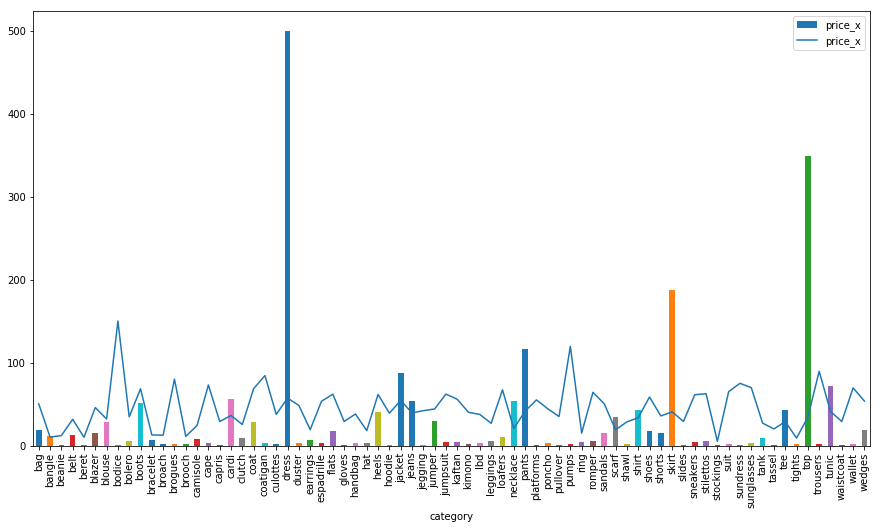

In [1137]:
fig, ax = plt.subplots(figsize = (15,8))
# df.plot(y = ['value'], kind = 'line', ax = ax)
# df.plot(x = ['year'], y= ['value1','value2'], kind = 'bar', ax = ax)

category_group.plot(y = 'price_x', kind='bar', ax=ax, use_index=False)
avg_price.plot(y = 'price_x', kind='line', ax=ax, rot=90)

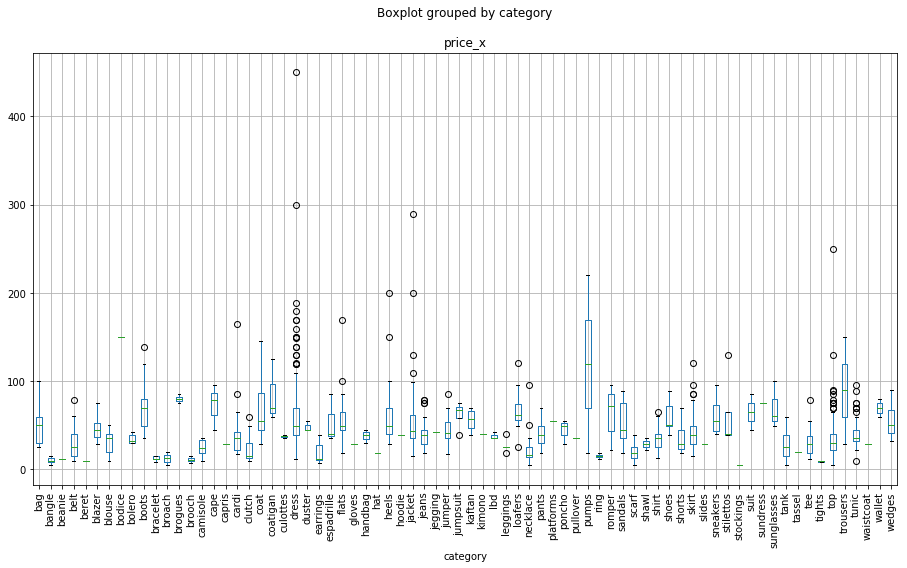

In [1147]:
cleaned_df.boxplot(column='price_x', by='category',figsize=(15,8),rot=90)

# Post outlier change

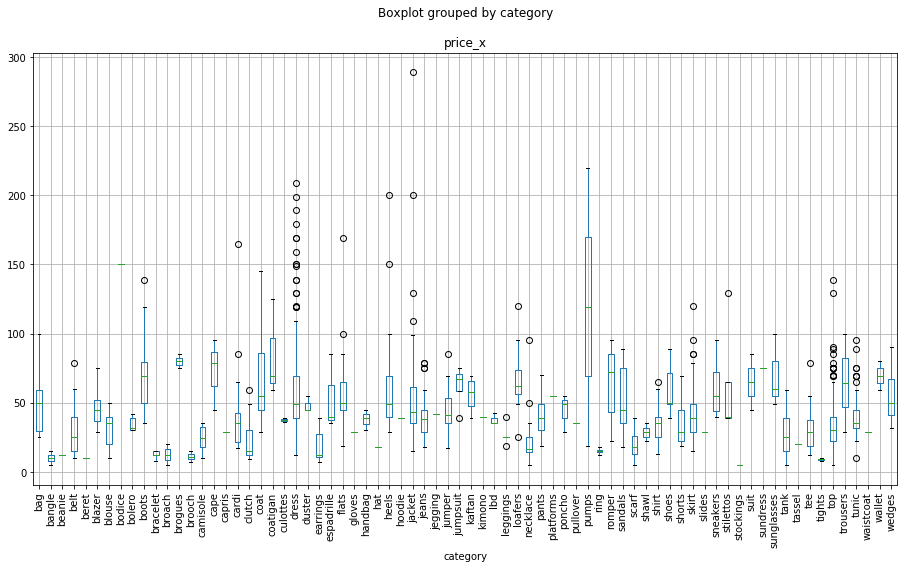

In [1276]:
cleaned_df.boxplot(column='price_x', by='category',figsize=(15,8),rot=90)

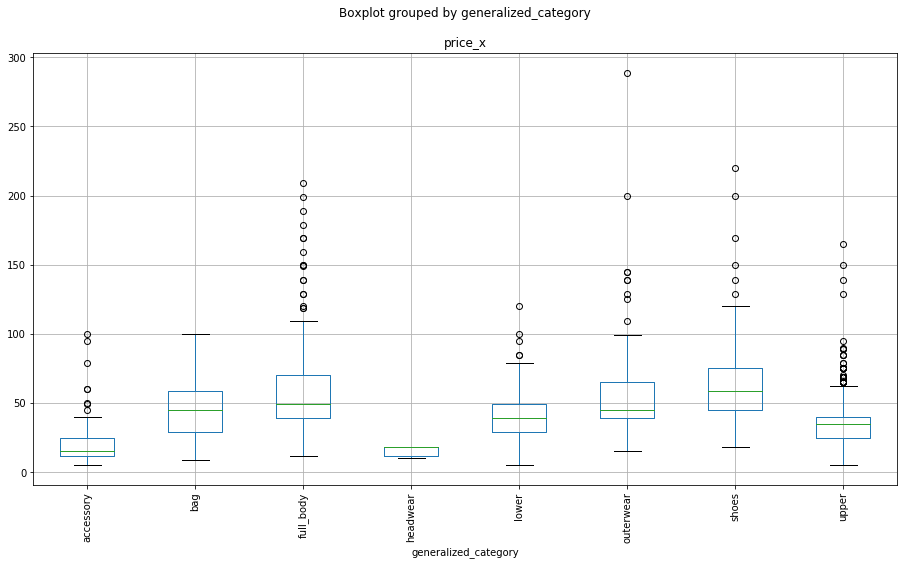

In [1280]:
cleaned_df.boxplot(column='price_x', by='generalized_category',figsize=(15,8),rot=90)

In [1156]:
cleaned_df['category'][cleaned_df['price_x'] > 200]


288      dress
954      pumps
1280       top
1282     dress
1437    jacket
Name: category, dtype: object

In [1182]:
pd.set_option('display.max_rows', 500)


In [1160]:
cleaned_df.loc[[288, 954, 1280, 1282, 1437]]

price_x   size        brand category   fabric_0 fabric_1 fabric_2  \
288     300.0  10-20     CAMILLA     dress       silk  unknown  unknown   
954     220.0     40        GUCCI    pumps    unknown  unknown  unknown   
1280    250.0     12   MATICEVSKI      top  polyester    nylon   cotton   
1282    450.0     12  MATICEVSKI     dress      nylon   cotton     silk   
1437    289.0     10       MOOCHI   jacket    leather  acetate  viscose   

      fabric_3    fabric_4 fabric_5     ...      condition_5 condition_6  \
288    unknown     unknown  unknown     ...                                
954    unknown     unknown  unknown     ...                                
1280      silk    elastane  unknown     ...                                
1282  elastane  underskirt  unknown     ...                                
1437   unknown     unknown  unknown     ...                                

     condition_7 condition_8 condition_9 condition_10 condition_11  \
288                                                                  
954                                                                  
1280                                                                 
1282                                                                 
1437                                                                 

     condition_12 condition_13 condition_14  
288                                          
954                                          
1280                                         
1282                                         
1437                                         

[5 rows x 105 columns]

In [1184]:
cleaned_df.shape

(2065, 105)

In [1270]:
columns, values = zip(*sorted_coefs)

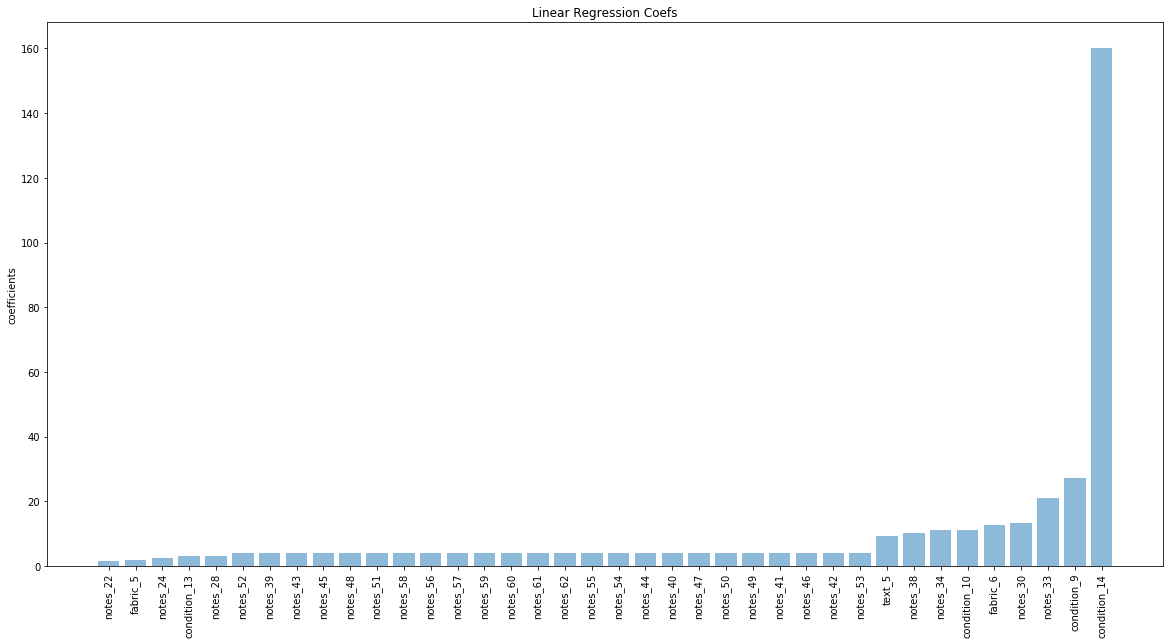

In [1275]:
objects = columns
y_pos = np.arange(len(objects))
performance = values
plt.figure(figsize=(20,10)) 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('coefficients')
plt.title('Linear Regression Coefs')

plt.show()

In [1279]:
cleaned_df.loc[cleaned_df['condition_14'] > ' ']

price_x size   brand category fabric_0   fabric_1 fabric_2 fabric_3  \
1249     42.0    8  MAHER     boots   rubber  synthetic  unknown  unknown   

     fabric_4 fabric_5 fabric_6 generalized_category           color color_0  \
1249  unknown  unknown  unknown                shoes  [multi, brown]   multi   

     color_1 color_2 color_3 color_4 color_5 color_6 color_7 notes_0 notes_1  \
1249   brown                                                                   

     notes_2 notes_3 notes_4 notes_5 notes_6 notes_7 notes_8 notes_9 notes_10  \
1249                                                                            

     notes_11 notes_12 notes_13 notes_14 notes_15 notes_16 notes_17 notes_18  \
1249                                                                           

     notes_19 notes_20 notes_21 notes_22 notes_23 notes_24 notes_25 notes_26  \
1249                                                                           

     notes_27 notes_28 notes_29 notes_30 notes_31 notes_32 notes_33 notes_34  \
1249                                                                           

     notes_35 notes_36 notes_37 notes_38 notes_39 notes_40 notes_41 notes_42  \
1249                                                                           

     notes_43 notes_44 notes_45 notes_46 notes_47 notes_48 notes_49 notes_50  \
1249                                                                           

     notes_51 notes_52 notes_53 notes_54 notes_55 notes_56 notes_57 notes_58  \
1249                                                                           

     notes_59 notes_60 notes_61 notes_62     text_0 text_1 text_2 text_3  \
1249                                      snakeskin  print                 

     text_4 text_5 condition_0 condition_1 condition_2 condition_3  \
1249                      cant      remove         one       studs   

     condition_4 condition_5 condition_6 condition_7 condition_8 condition_9  \
1249         toe    indented     outside        seen     missing       match   

     condition_10 condition_11 condition_12 condition_13 condition_14  
1249        could     preloved         good       inside         boot

# Taking care of outliers: They were all MATICEVSKI brand

dress had two: 1282 and 288, 450 and 300 respectively. I changed them to 199 and 209 for price which reflects the pattern for prices in next dresses lower

In [1187]:
#dress
cleaned_df.at[288, 'price_x'] = 199.0
cleaned_df.at[1282, 'price_x'] = 209.0

jacket had one outlier: 1437 of 289. I put it $10 above the highest

In [1192]:
cleaned_df.at[289, 'price_x'] = 210.0

Top had one outlier > 200: put 1280 $10 above the highest
Trousers: 1279 set at 100, closer to pants, capris, etc. Nothing is over 100 except that one pair

In [1197]:
cleaned_df.at[1280, 'price_x'] = 139.0

In [1198]:
cleaned_df.at[1279, 'price_x'] = 100.0

In [1200]:
cleaned_df.sort_values(by=['brand','price_x'], axis=0, ascending=False)[500:1000]

price_x              size                      brand    category  \
1560     30.0  No size in title                  PASHMINA        scarf   
1562     28.0  No size in title                  PASHMINA        scarf   
1561     18.0  No size in title                  PASHMINA        scarf   
1558     42.0                10                 PARKVOGEL       bolero   
1557     20.0                10                    PARKER          top   
1556     20.0             14-16                    PARISAN        belt   
1554     45.0                12                    PAGANI        dress   
1555     20.0                10                    PAGANI        dress   
1553     15.0                10                    PAGANI          top   
1552     35.0                12                     PAGANI       dress   
1545     45.0                 9                  OVERLAND       wedges   
1546     40.0               7.5                  OVERLAND        flats   
1544     45.0                12               OUI MOMENTS        dress   
1543     22.0                12                   OSCAR-ST       pants   
1542     60.0  No size in title                    OROTON          bag   
1541     55.0  No size in title                    OROTON          bag   
1540     49.0  No size in title                    OROTON       clutch   
1539      9.0  No size in title                     ORIGIN    necklace   
1537     40.0             16-18                       OPM       jacket   
1536     39.0                37                    OPHELIE       boots   
1535     49.0             10-20                       OOSH         top   
1534     59.0             14-16                   OOBY RYN         top   
1533     49.0             7.5-8            ONE TRICK PONY        heels   
1532     65.0                39             ONE TRICK PONY       flats   
1530     69.0                14              ONE TEASPOON       jumper   
1531     49.0                10              ONE TEASPOON        pants   
1529     25.0             12-14                ONE SEASON        skirt   
1528     49.0                12                   ONCE WAS       jeans   
1527     29.0                10              OLIVER BLACK        pants   
1522     59.0             12-14                 OLI & GUS          top   
1523     45.0             12-14                 OLI & GUS          top   
1525     42.0                16                 OLI & GUS          top   
1524     30.0             12-14                 OLI & GUS          tee   
1521     75.0                12                  OLI & GUS         top   
1520     16.0                12                  OLD NAVY          top   
1519     85.0             12-14                 ODD MOLLY        dress   
1518     79.0              8-16                        OBR        cape   
1514     80.0                18                       OBI        dress   
1509     75.0                18                       OBI        tunic   
1515     69.0                18                       OBI          top   
1507     49.0                20                       OBI        skirt   
1512     49.0                16                       OBI          top   
1510     45.0                12                       OBI          top   
1513     42.0                12                       OBI       jacket   
1516     40.0                10                       OBI        pants   
1506     39.0                10                       OBI        pants   
1511     39.0                14                       OBI        skirt   
1517     39.0                10                       OBI        skirt   
1508     35.0             10-12                       OBI          top   
1505      9.0  No size in title              OASIS BEAUTY       clutch   
1504     35.0                12                     OASIS        pants   
1503     30.0             10-12                     OASIS        dress   
1502     29.0                12                     OASIS        skirt   
886      7

In [1152]:
cleaned_df['price_x'].mean()

44.75326876513317

In [1138]:
dress = [cleaned_df['category'] == 'bodice']

price_x size       brand category INNER SOLE  fabric_0 fabric_1  \
1281    150.0   12  MATICEVSKI   bodice    unknown  elastane   cotton   

     fabric_2 fabric_3 fabric_4     ...      condition_5 condition_6  \
1281     silk  unknown  unknown     ...                                

     condition_7 condition_8 condition_9 condition_10 condition_11  \
1281                                                                 

     condition_12 condition_13 condition_14  
1281                                         

[1 rows x 106 columns]

In [1139]:
df.loc[1281, 'url']

'https://recycle-style.myshopify.com/collections/all/products/maticevski-magnificent-bodice-strapless-top-12'